# 538 Riddler Posted on Sept. 16 2016

# The prompt:
You are one of 30 team owners in a professional sports league. In the past, your league set the order for its annual draft using the teams’ records from the previous season — the team with the worst record got the first draft pick, the team with the second-worst record got the next pick, and so on. However, due to concerns about teams intentionally losing games to improve their picks, the league adopts a modified system. This year, each team tosses a coin. All the teams that call their coin toss correctly go into Group A, and the teams that lost the toss go into Group B. All the Group A teams pick before all the Group B teams; within each group, picks are ordered in the traditional way, from worst record to best. If your team would have picked 10th in the old system, what is your expected draft position under the new system?

Extra credit: Suppose each team is randomly assigned to one of T groups where all the teams in Group 1 pick, then all the teams in Group 2, and so on. (The coin-flipping scenario above is the case where T = 2.) What is the expected draft position of the team with the Nth-best record?

# Cop-out:
I don't really feel like working through the problem in full generality at this exact moment, though I will work the case $T = 2$ in slightly more generality than the problem was stated. In particular I'll allow for unfair coins, a different number of teams and also a different past season rank.

# Analytic Solution:

Some notation:

- $D_{\text{old}}$ to denote the order we would have been assigned in the old draft, this is 10 in the problem statement, but I'll keep it general 
- $D$ to represent the draft pick we get in the new system
- $A$ and $B$ to represent the event that we are assigned to groups A and B respectively.
- $N$ to denote the total number of teams
- $N_A$ to denote the number assigned to group A
- $O_A$ and $O_B$ to denote the pick order within whichever group we're assigned


The description tells us that if we're assigned to group A, our draft pick will correspond to our order within group A. That is, $D = O_A$ when we're assigned to group A. On the other hand, when we're assigned to group B, all of the group A teams pick before any group B team picks. So when we're assigned to group B, we have that $D = N_A + O_B$.

This tells us that:
$$
\begin{array}{cl}
    E[D] &= E[D|A] \cdot P(A) + E[D|B] \cdot P(B)\\
     &= E[O_A] \cdot P(A) + E[N_A + O_B] \cdot P(B)\\
     &= E[O_A] \cdot P(A) + \left(E[N_A| B] + E[O_B]\right) \cdot P(B)\\
\end{array}
$$

So we need to figure out what our expected order is within either group, i.e. $E[O_A], E[O_B]$, and the expected number of teams assigned to group A, i.e. $E[N_A]$.


#### Computing $E[O_A]$ and $E[O_B]$
Our old draft pick number was $D_{\text{old}}$, and our group order $O_A$ in the new pick will  be the rank of $D_{\text{old}}$ amongst all old-style draft picks assigned to the same group as us. Our rank is one more than the number of teams with lower pick numbers assigned to our group. Since each team is assigned to group A with probability $P(A)$, we see that the number of teams with lower pick orders in group A is a Binomial random variable with $n = D_{\text{old}} - 1$ and $p = P(A)$. So,
$$O_A \sim 1 + \text{Binomial}(P(A), D_\text{old} - 1)$$
Hence,
$$ E[O_A] = 1 + (D_\text{old} - 1) \cdot P(A)$$

An analogous expression holds for $E[O_B]$. Note, in the case of a fair coin, we have $P(A) = P(B) = 0.5$ so we actually have that $E[O_A] = E[O_B]$.


#### Computing $E[N_A | B]$.
A similar argument shows that, when we have been assigned to group B, the number of teams assigned to group A is a binomial random variable with $p = P(A)$ and $n = N - 1$  (i.e. we've already been assigned to group B, so there are only $N-1$ teams that could possibly be assigned to group A).

So we have that:
$$ E[N_A] = (N - 1) \cdot P(A) $$


### Putting it together:
$$
\begin{array}{cl}
    E[D] &= E[O_A] \cdot P(A) + \left(E[N_A| B] + E[O_B]\right) \cdot P(B)\\
     &= (1 + P(A) (D_{\text{old}} - 1))  \cdot P(A) + \left((N - 1) P(A) + (1 + P(B) (D_{\text{old}}- 1))\right) \cdot P(B)\\
\end{array}
$$

### Solution to the Riddler (no extra credit):
Using that $P(A) = P(B) = 0.5$, $N = 30$, and $D_{\text{old}} = 10$, we see $E[O_A] = E[O_B] = 1 +  0.5 \cdot 9 = 5.5$ and $E[N_A | B] = 29 \cdot 0.5 = 14.5$. So:
$$
    E[D] = 0.5 \cdot 5.5 + 0.5 \cdot (5.5 + 14.5) = \fbox{12.75}
$$


# Simulation:
We'll simulate the process as a sanity check for the solution given above.

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [70]:
def analytical_solution(order=10, n_teams = 30, P_A = 0.5):
    P_B = 1 - P_A
    E_groupA = P_A * (1 + P_A * (order - 1))
    E_groupB = P_B * ( (n_teams - 1) * P_A + (1 + P_B * (order - 1) ) )
    return E_groupA + E_groupB

In [32]:
def simulate(n_runs, n_teams=30, order=10, P_A = 0.5):
    draft_position = np.zeros(n_runs)    

    # flip a coin for each run and each team, 
    #    correct call > 0.5
    #    incorrect call <= 0.5    
    rvs = np.random.rand(n_runs, n_teams)
    rvs = rvs > P_A
    
    for i in range(n_runs):
        # In this case, you called correctly so you're assigne Group A
        if rvs[i, order - 1]:
            # All the team numbers that get assigned to Group A:
            idx = np.where(rvs[i,:])[0] 
            
            # how many teams get draft picks before you within Group A:
            n_before = len(np.where(idx < order - 1)[0])
            
            # You're draft position:
            draft_position[i] = n_before + 1

        # In this case, you called incorrectly so you're assigned Group B      
        else:
            # All the teams that get assigned to to Group B
            idx = np.where(~rvs[i,:])[0]
            
            # How many pick temas get draft picks before you within group B:
            n_before_B = len(np.where(idx < order - 1)[0])

            # How many pick teams get draft picks before you from group A:
            n_before_A = len(np.where(rvs[i,:])[0])

            # Add 1 to get your order:
            draft_position[i] = n_before_A + n_before_B + 1
            
        #print rvs[i, order-1], len(np.where(idx < order - 1)[0]), idx
    return draft_position

In [62]:
draft_position = simulate(100000, P_A = 0.5)

So what do we get as our expected draft position?

In [63]:
expected_draft_position = np.mean(draft_position)
print expected_draft_position

12.79385


Great! We get very close to the analytical solution of $12.75$.

# Examining the draft position distribution:

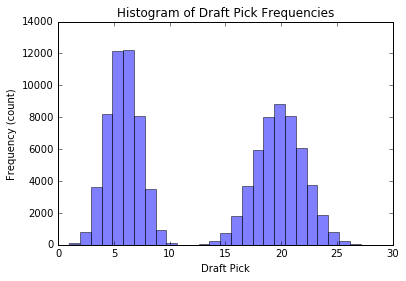

In [87]:
plt.hist(draft_position, bins=30, alpha = 0.5);
plt.title('Histogram of Draft Pick Frequencies');
plt.xlabel('Draft Pick');
plt.ylabel('Frequency (count)');

Unsurprisingly, we get a bimodal distribution of draft picks. The first peak comes from the occasions where the team is assigned group A, and the second peak results from those times that we get assigned group B.

# Examining effect of unfair coins:

While playing around with this problem, I started wondering about what would happen if the coin wasn't fair. Pretty clearly, if the probability of getting assigned to group A were 1 or 0... then the new system reduces to the old one. But how bad is the new system for you?

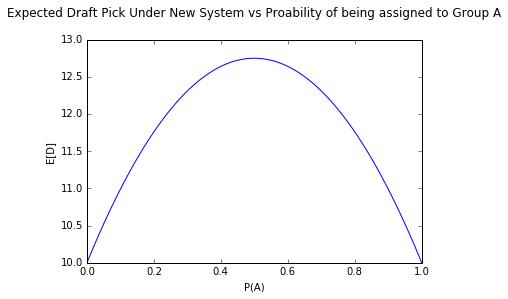

In [84]:
p = np.linspace(0,1,100)
E = np.zeros(len(p))
for i in range(len(p)):
    E[i] = analytical_solution(P_A = p[i])    
plt.plot(p, E);
plt.title('Expected Draft Pick Under New System vs Proability of being assigned to Group A', y =1.08);
plt.xlabel('P(A)');
plt.ylabel('E[D]');